In [31]:
import numpy as np
import pandas as pd
import edhec_risk_kit_206 as erk
%load_ext autoreload
%autoreload 2

ind_rets = erk.get_ind_returns(weighting="vw", n_inds=49)["2014":"2018"]
ind_mcap = erk.get_ind_market_caps(49, weights=True)["2014":"2018"]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
cov = ind_rets.cov()

In [67]:
RR = pd.DataFrame([1/49]*49,['Agric', 'Food', 'Soda', 'Beer', 'Smoke', 'Toys', 'Fun', 'Books',
       'Hshld', 'Clths', 'Hlth', 'MedEq', 'Drugs', 'Chems', 'Rubbr', 'Txtls',
       'BldMt', 'Cnstr', 'Steel', 'FabPr', 'Mach', 'ElcEq', 'Autos', 'Aero',
       'Ships', 'Guns', 'Gold', 'Mines', 'Coal', 'Oil', 'Util', 'Telcm',
       'PerSv', 'BusSv', 'Hardw', 'Softw', 'Chips', 'LabEq', 'Paper', 'Boxes',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Banks', 'Insur', 'RlEst', 'Fin',
       'Other']).T
print(erk.risk_contribution(RR.sum(), cov).max())#4
erc_w = erk.weight_erc(ind_rets, cov_estimator=erk.sample_cov)
print(RR.columns[(erc_w == erc_w.max())])#5

0.030937663971181428
Index(['Util'], dtype='object')


In [91]:
rc=erk.risk_contribution(erk.weight_cw(ind_rets,ind_mcap),cov)

In [94]:
rc[rc ==rc.max()]#1-2

Banks    0.10406
dtype: float64

In [95]:
max = rc[rc ==rc.max()]
min = rc[rc ==rc.min()]
max[0] - min[0]

0.1039644943981684

In [89]:
RR[RR.columns[(erc_w == erc_w.max())]]#6

,Util
0,0.020408


In [82]:
rc = erk.risk_contribution(RR.sum(), cov)
rc[rc==rc.max()]

Steel    0.030938
dtype: float64

In [69]:
print(erk.risk_contribution(RR.sum(), cov).min())#8
erc_w = erk.weight_erc(ind_rets, cov_estimator=erk.sample_cov)
print(RR.columns[(erc_w == erc_w.min())])#7

0.005915906346269964
Index(['Steel'], dtype='object')


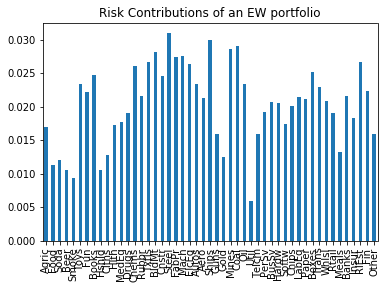

In [71]:
risk = erk.risk_contribution(erk.weight_ew(ind_rets), cov)
risk.plot.bar(title="Risk Contributions of an EW portfolio");

In [72]:
risk[risk==risk.max()]

Steel    0.030938
dtype: float64

In [50]:
risk[risk==risk.min()]

Util    0.005916
dtype: float64

In [55]:
#q - 10
max = risk[risk==risk.max()]
min = risk[risk==risk.min()]
max[0] - min[0]

0.02502175762491146

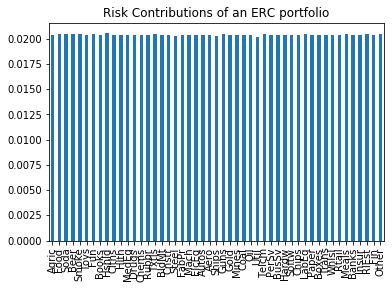

In [45]:
erc_risk = erk.risk_contribution(erk.equal_risk_contributions(cov), cov)
erc_risk.plot.bar(title="Risk Contributions of an ERC portfolio");

In [46]:
erc_risk[erc_risk==erc_risk.max()]

Hshld    0.020533
dtype: float64

In [47]:
erc_risk[erc_risk==erc_risk.min()]

Util    0.020168
dtype: float64